# TODO
- ALT QUESTION: which LR differences are predictive of age?
- get errors (dispersion) instead of correlation
- inspect >1 correlations

# NOTES


In [260]:
%connect_info

{
  "shell_port": 53565,
  "iopub_port": 51053,
  "stdin_port": 34631,
  "control_port": 33195,
  "hb_port": 39267,
  "ip": "127.0.0.1",
  "key": "d1ee3b77-86d681b22e40ca0b5c052aeb",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-0bd52518-0a8b-4be9-952f-385b1495ed20.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [ ]:
jupyter console --existing kernel-330eddd6-581f-460a-9e32-19c0223565f3.json

In [2]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from vacou import *
from plots import *
import regtest.regtest as rt

from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(font="monospace")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_fp = '/P/vacou/data/SS31_gait_data_for_PCA.tsv'
sep_runs_data_fp = '/P/vacou/data/all_separate_runs.csv'
#d_orig = pd.read_csv(data_fp, sep='\t')
response_column = 'Group'

In [4]:
d_or, md, full_df = preprocess_vc(version = 6, data_fp=data_fp, use_vars_fp='data/use_variables.csv')

Mouse-size normalized data. Laterality


In [5]:
# unified colours for groups
group_colname = 'Group'
color_map = dict(zip(set(md[group_colname]),
                     sns.color_palette("Set2", len(set(md[group_colname])))[::-1]
                    ))

In [6]:
md.groupby('Group').apply(lambda x: x.shape[0])

Group
A    30
Y    15
dtype: int64

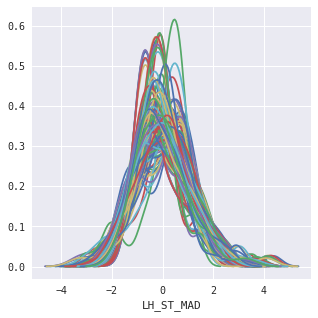

In [7]:
d=d_or
#d = normalize_pd(d, axis=0)
d = scale_pd(d, axis=0)
d = mean_center_pd(d)
#d = maxabs_scale_pd(d, axis=0)

fig, ax = plt.subplots(figsize=(5,5))
for c in d:
    sns.distplot(d[c], hist=False)

In [8]:
d.index.get_level_values(2)

Index(['1.1', '1.2', '1.3', '1.4', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3', '2.4', '3.1', '3.2', '1.1', '1.2', '1.3', '1.4', '2.1',
       '2.2', '2.3', '2.4', '3.1', '3.2', '3.3', '3.4', '4.1', '4.2', '4.3',
       '4.4', '5.1', '5.2', '5.3', '5.4'],
      dtype='object', name='Animal')

In [34]:
[i for i in d.columns]

['mouse length (cm)',
 'Normalized average run speed',
 'RF_Stand_(s)_Mean',
 'RF_StandIndex_Mean',
 'RF_MaxContactAt_(%)_Mean',
 'RF_MaxContactArea_(cm²)_Mean',
 'RF_MaxContactMaxIntensity_Mean',
 'RF_MaxContactMeanIntensity_Mean',
 'RF_PrintLength_(cm)_Mean',
 'RF_PrintWidth_(cm)_Mean',
 'RF_PrintArea_(cm²)_Mean',
 'RF_MaxIntensityAt_(%)_Mean',
 'RF_MaxIntensity_Mean',
 'RF_MinIntensity_Mean',
 'RF_MeanIntensity_Mean',
 'RF_MeanIntensityOfThe15MostIntensePixels_Mean',
 'RF_Swing_(s)_Mean',
 'RF_SwingSpeed_(cm/s)_Mean',
 'RF_StrideLength_(cm)_Mean',
 'RF_StepCycle_(s)_Mean',
 'RF_DutyCycle_(%)_Mean',
 'RF_SingleStance_(s)_Mean',
 'RF_InitialDualStance_(s)_Mean',
 'RF_TerminalDualStance_(s)_Mean',
 'RF_BodySpeed_(cm/s)_Mean',
 'RH_Stand_(s)_Mean',
 'RH_StandIndex_Mean',
 'RH_MaxContactAt_(%)_Mean',
 'RH_MaxContactArea_(cm²)_Mean',
 'RH_MaxContactMaxIntensity_Mean',
 'RH_MaxContactMeanIntensity_Mean',
 'RH_PrintLength_(cm)_Mean',
 'RH_PrintWidth_(cm)_Mean',
 'RH_PrintArea_(cm²)_Mean',
 

In [9]:
#sd, smd, sfull_df = preprocess_vc(sep_runs_data_fp, version = 3, use_vars_fp='data/use_variables.csv')

## heatmap of parameters

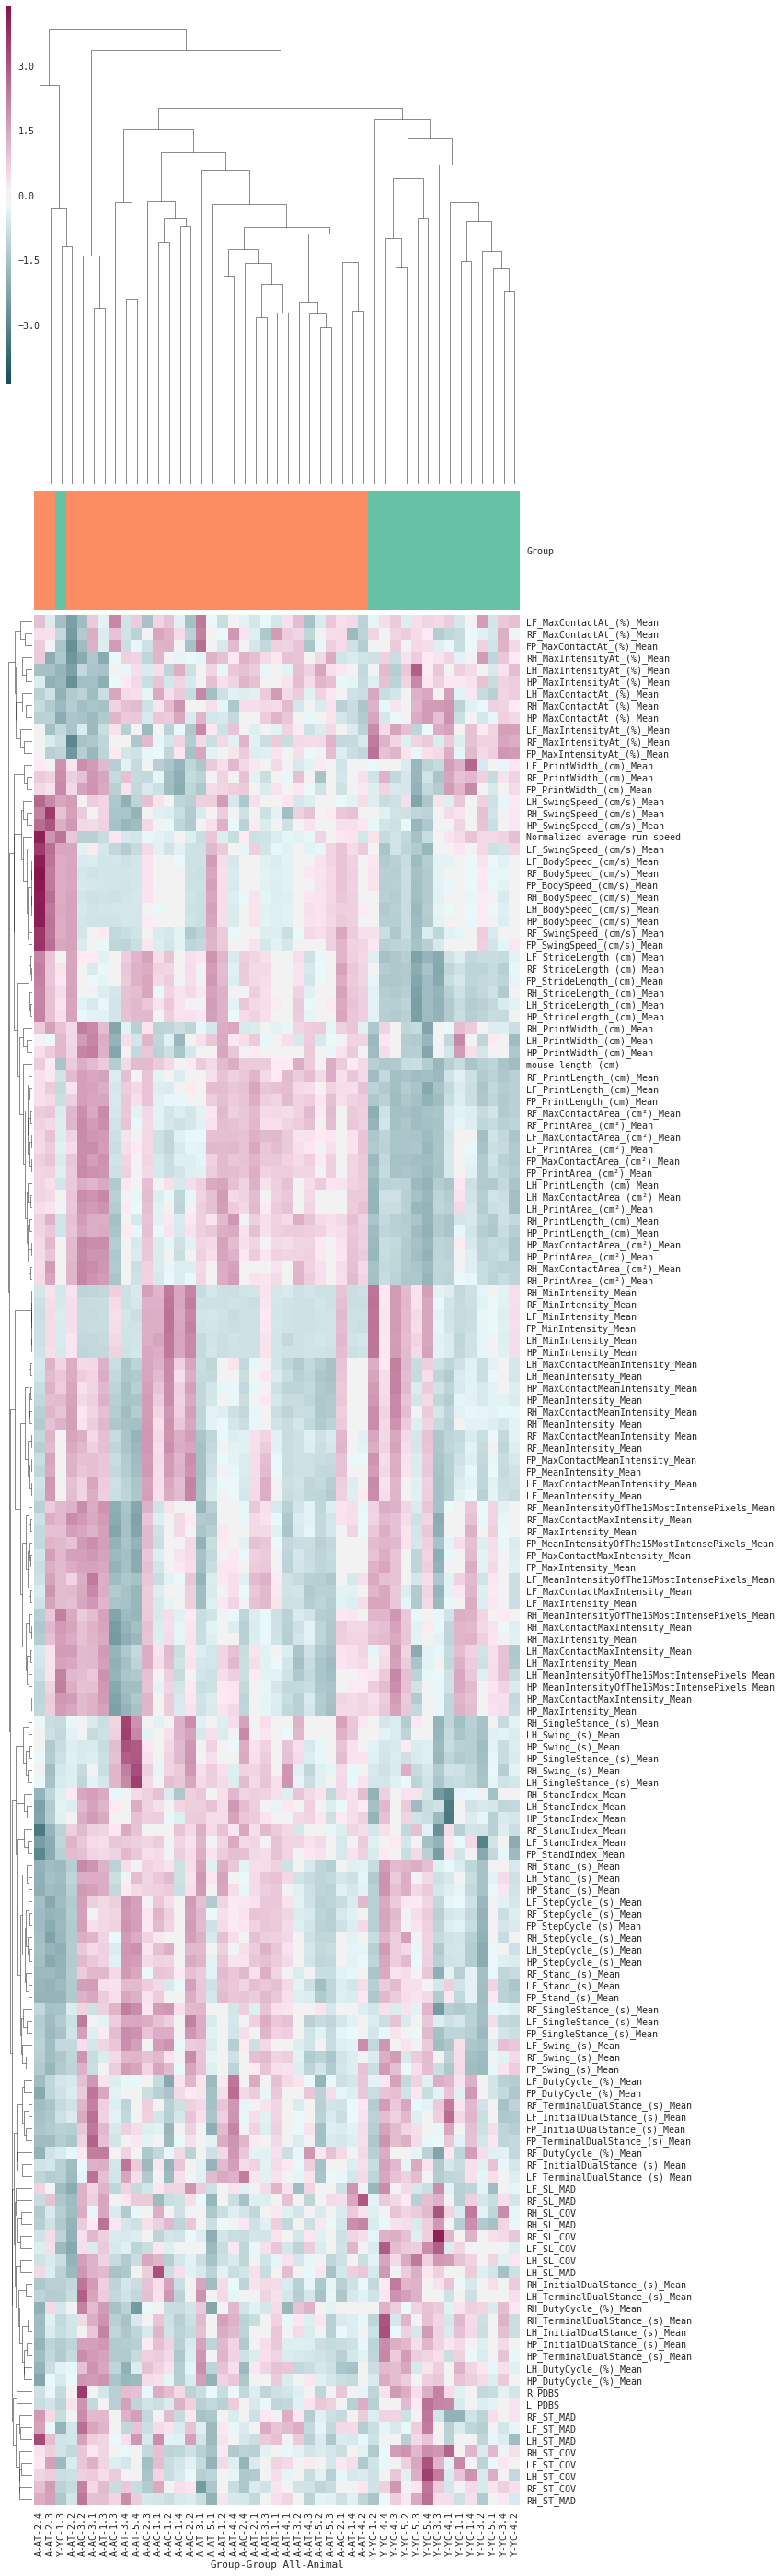

In [10]:
heatmap_with_levels(d.T, use_index_level='Group', figsize=(10,50));

### I'd like to know which variables seem promising.

In [11]:
selected_a, _ = sel_anova(d, md['Group'], mode = 'classif')
print("Features selected by f_regression")
selected_a.ix[selected_a.pval < 0.05]

Features selected by f_regression


,param,pval
0,mouse length (cm),5.771471e-16
100,FP_PrintLength_(cm)_Mean,1.274370e-14
54,LF_PrintLength_(cm)_Mean,5.442695e-14
8,RF_PrintLength_(cm)_Mean,1.743071e-13
123,HP_PrintLength_(cm)_Mean,1.799055e-12
77,LH_PrintLength_(cm)_Mean,2.718884e-12
31,RH_PrintLength_(cm)_Mean,5.487773e-11
97,FP_MaxContactArea_(cm²)_Mean,8.070878e-10
5,RF_MaxContactArea_(cm²)_Mean,9.771617e-10
102,FP_PrintArea_(cm²)_Mean,2.148454e-09


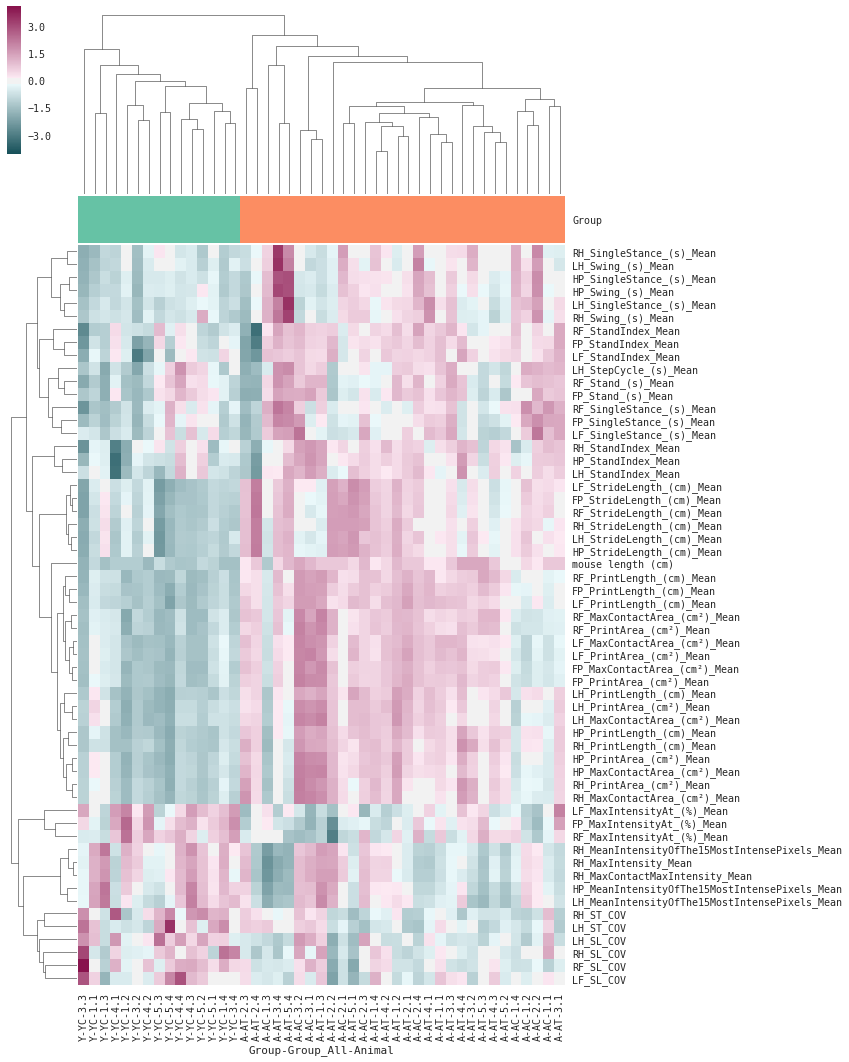

In [12]:
sel = selected_a.param[selected_a.pval < 0.05].tolist()
heatmap_with_levels(d.T.loc[sel], use_index_level='Group', figsize=(10,18));

# Left side - right side relationships - 'laterality'
Values in the table are correlations between each left-side gait parameter and the corresponding right-seid gait parameter. Lowest correlations are sorted first.

In [13]:
madiff = dist_L_R(full_df, metric='ma_difference', use_level=0)
covs = dist_L_R(full_df, metric='covariance', use_level=0)

In [14]:
corrs = dist_L_R(full_df, metric='correlation', use_level=0)
#corrs.groupby(corrs.index.get_level_values(0)).apply(lambda x: x.sort_values('correlation', ascending=True))
#corrs.sort_values('correlation', ascending=True).head(10)

In [15]:
distances = pd.merge(corrs, madiff)
distances = pd.merge(distances, covs)

In [16]:
distances.sort_values('correlation', ascending=True).tail(10)

,group,parameter,correlation,ma_difference,covariance
96,Y,H_SL_COV,0.649752,0.057314,0.001167
80,Y,F_TerminalDualStance_(s)_Mean,0.694058,0.012400,0.000058
16,A,F_SL_MAD,0.707171,0.132404,0.005079
7,A,F_MaxIntensityAt_(%)_Mean,0.713103,5.336152,8.266092
58,Y,F_MaxContactAt_(%)_Mean,0.769689,4.134189,4.275467
107,Y,H_TerminalDualStance_(s)_Mean,0.795289,0.027306,0.000163
55,Y,F_DutyCycle_(%)_Mean,0.819050,2.658571,1.277986
56,Y,F_InitialDualStance_(s)_Mean,0.849692,0.014356,0.000027
106,Y,H_Swing_(s)_Mean,0.852383,0.014367,0.000042
83,Y,H_InitialDualStance_(s)_Mean,1.039210,0.032621,-0.000031


In [17]:
corrs.groupby('group').apply(lambda x: x.sort_values('correlation', ascending=True).head())\
        .drop('group',1)

parameter  correlation
group                                          
A     11       F_MinIntensity_Mean     0.003096
      0    F_BodySpeed_(cm/s)_Mean     0.003533
      27   H_BodySpeed_(cm/s)_Mean     0.003549
      38       H_MinIntensity_Mean     0.010294
      23  F_StrideLength_(cm)_Mean     0.042480
Y     65       F_MinIntensity_Mean     0.002692
      92       H_MinIntensity_Mean     0.004482
      54   F_BodySpeed_(cm/s)_Mean     0.006507
      81   H_BodySpeed_(cm/s)_Mean     0.007488
      76      F_StepCycle_(s)_Mean     0.026493

In [18]:
madiff.groupby('group').apply(lambda x: x.sort_values('ma_difference', ascending=True).head())\
        .drop('group',1)

parameter  ma_difference
group                                                  
A     45                        H_ST_MAD       0.005795
      18                        F_ST_MAD       0.006101
      2     F_InitialDualStance_(s)_Mean       0.009735
      26   F_TerminalDualStance_(s)_Mean       0.010363
      22            F_StepCycle_(s)_Mean       0.012049
Y     72                        F_ST_MAD       0.006834
      99                        H_ST_MAD       0.007482
      100        H_SingleStance_(s)_Mean       0.010525
      76            F_StepCycle_(s)_Mean       0.012202
      80   F_TerminalDualStance_(s)_Mean       0.012400

In [39]:
color_map

{'A': (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 'Y': (0.9882352941176471, 0.55294117647058827, 0.3843137254901961)}

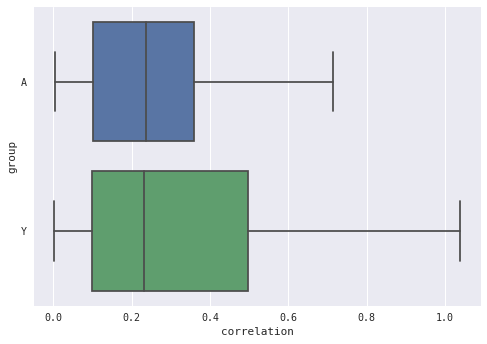

In [43]:
corrs_ = corrs.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=corrs_, x='correlation', y='group')#, hue='Group_All')


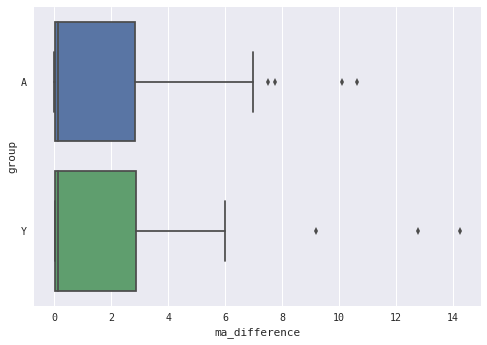

In [25]:
madiff_ = madiff.reset_index()#.rename(columns={0:'corr'})
sns.boxplot(data=madiff_, x='ma_difference', y='group')#, hue='Group_All')


# Regularity Index

### 1. I'd like to know which variables seem promising: which are different between groups with p-value < 0.05?

In [26]:
selected_a, _ = sel_anova(d, md['Group'], mode = 'classif')
print("Features selected by f_regression")
significantYA = selected_a.ix[selected_a.pval < 0.05]
significantYA

Features selected by f_regression


,param,pval
0,mouse length (cm),5.771471e-16
100,FP_PrintLength_(cm)_Mean,1.274370e-14
54,LF_PrintLength_(cm)_Mean,5.442695e-14
8,RF_PrintLength_(cm)_Mean,1.743071e-13
123,HP_PrintLength_(cm)_Mean,1.799055e-12
77,LH_PrintLength_(cm)_Mean,2.718884e-12
31,RH_PrintLength_(cm)_Mean,5.487773e-11
97,FP_MaxContactArea_(cm²)_Mean,8.070878e-10
5,RF_MaxContactArea_(cm²)_Mean,9.771617e-10
102,FP_PrintArea_(cm²)_Mean,2.148454e-09


### 2. Can I combine them to some reasonable Regularity Index? (Or really, age index)
Turns out to be more of an 'irregularity index' - can be inverted

I am going to define RI as the weighted average of all parameters, where weights: 1/p-value:
RI = parameter * (1/pval), [0,1]

In [27]:

RI = RI_calculate(d, RI_get_weights(d, md))
RI

Group  Group_All  Animal
Y      YC         1.1       0.291585
                  1.2       0.188509
                  1.3       0.109361
                  1.4       0.110012
                  3.2       0.188299
                  3.3       0.000000
                  3.4       0.100800
                  4.1       0.197326
                  4.2       0.055679
                  4.3       0.142992
                  4.4       0.140019
                  5.1       0.237741
                  5.2       0.275204
                  5.3       0.293742
                  5.4       0.156669
A      AC         1.1       0.790470
                  1.2       0.706072
                  1.3       0.181107
                  1.4       0.533828
                  2.1       0.804847
                  2.2       0.626384
                  2.3       0.900883
                  2.4       0.814118
                  3.1       0.911888
                  3.2       1.000000
       AT         1.1       0.636190
             

In [30]:
# cross-validate on the dataset: how well can a subset of data
# recreate RI for a hidden portion of data?
# The mean diffrence is
pd.concat(RI_CV(d, md, n_trials = 100, test_size=0.25)).mean()

0.06659809120076111

'cross-validate' on the dataset: how well can a subset of data
recreate RI for a hidden portion of data?
The mean diffrence is
about 7%

Let's plot the Index

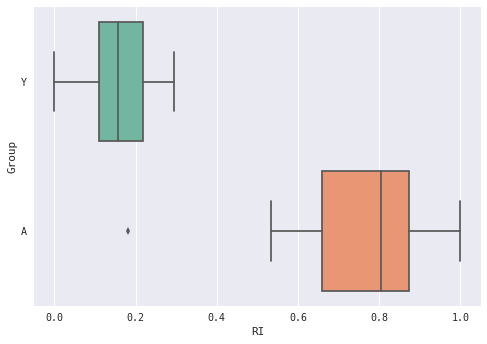

In [47]:
RI_ = RI.reset_index().rename(columns={0:'RI'})
sns.boxplot(data=RI_, x='RI', y='Group', palette="Set2");

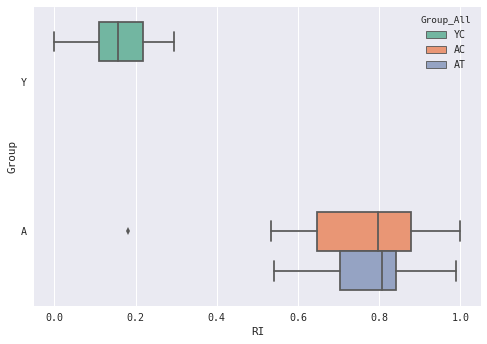

In [41]:
RI_ = RI.reset_index().rename(columns={0:'RI'})
sns.boxplot(data=RI_, x='RI', y='Group', hue='Group_All', palette="Set2");

# Comparison of right and left side parameters

In [96]:
d.head()

mouse length (cm)  Normalized average run speed  \
Group Group_All Animal                                                    
Y     YC        1.1             -0.882512                      0.443822   
                1.2             -1.169975                      0.295453   
                1.3             -1.464624                      2.477003   
                1.4             -1.464624                      0.904252   
                3.2             -1.169975                      0.485108   

                        RF_Stand_(s)_Mean  RF_StandIndex_Mean  \
Group Group_All Animal                                          
Y     YC        1.1             -1.193990           -1.170111   
                1.2             -1.446396           -0.624179   
                1.3             -1.844404           -1.124329   
                1.4             -0.337827           -0.664621   
                3.2             -1.587421           -0.704741   

                        RF_MaxContactAt_(%)_Mean  \
Group Group_All Animal                             
Y     YC        1.1                    -0.901211   
                1.2                     0.548316   
                1.3                    -0.940925   
                1.4                    -0.181982   
                3.2                    -0.403865   

                        RF_MaxContactArea_(cm²)_Mean  \
Group Group_All Animal                                 
Y     YC        1.1                        -0.368221   
                1.2                        -2.004360   
                1.3                        -0.487166   
                1.4                        -0.445903   
                3.2                        -0.893239   

                        RF_MaxContactMaxIntensity_Mean  \
Group Group_All Animal                                   
Y     YC        1.1                          -0.039365   
                1.2                           0.607410   
                1.3                           1.121029   
                1.4                           0.922682   
                3.2                          -0.214010   

                        RF_MaxContactMeanIntensity_Mean  \
Group Group_All Animal                                    
Y     YC        1.1                           -0.946931   
                1.2                            1.507129   
                1.3                           -0.147481   
                1.4                           -0.478370   
                3.2                           -0.835914   

                        RF_PrintLength_(cm)_Mean  RF_PrintWidth_(cm)_Mean  \
Group Group_All Animal                                                      
Y     YC        1.1                    -0.396016                 0.943401   
                1.2                    -1.643520                -0.683155   
                1.3                    -0.683017                 1.951159   
                1.4                    -0.762579                 1.146502   
                3.2                    -1.271977                 0.667764   

                          ...      LF_ST_COV  LH_ST_COV  RF_SL_MAD  RH_SL_MAD  \
Group Group_All Animal    ...                                                   
Y     YC        1.1       ...       2.051122   0.890125  -1.168480  -1.203155   
                1.2       ...      -0.711305  -0.723254  -0.334150  -0.481625   
                1.3       ...      -1.678276  -0.802349  -1.392651  -1.324020   
                1.4       ...      -0.058506   1.844939   0.662929   1.911741   
                3.2       ...      -1.125696  -0.546330  -0.633949  -1.317976   

                        LF_SL_MAD  LH_SL_MAD  LF_ST_MAD  RF_ST_MAD  RH_ST_MAD  \
Group Group_All Animal                                                          
Y     YC        1.1     -1.181894  -0.109082  -0.515202  -1.896673  -0.758367   
                1.2     -1.743645  -0.554845  -0.813795  -0.450308  -1.405864   
                1.3     -1.6581

In [97]:
d_plot = plot_L_R(d, use_level=0)

In [98]:
d_plot.head()

,Group,parameter,Animal,L,R
0,A,H_Stand_(s)_Mean,1.1,1.762925,1.095415
1,A,H_Stand_(s)_Mean,1.2,2.648285,1.628557
2,A,H_Stand_(s)_Mean,1.3,0.591314,0.123929
3,A,H_Stand_(s)_Mean,1.4,-1.533314,-1.161822
4,A,H_Stand_(s)_Mean,2.1,-0.191816,0.330068


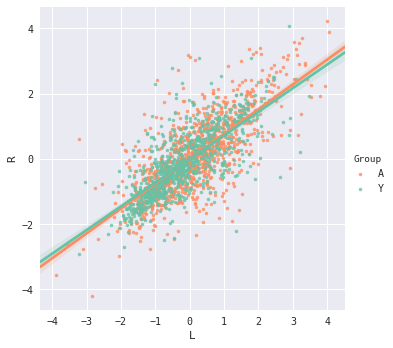

In [344]:
sns.lmplot(x='L', y='R', data=d_plot, hue='Group',  markers=".", palette=color_map);

Each point on the plot represents a sided parameter.

In [100]:
d_plot.groupby('Group').mean()

,L,R
Group,,
A,0.143339,0.108834
Y,-0.191119,-0.145112


The table shows the mean value of the left and right side parameters in young and aged mice. Collapsing mice to correlation isn't a good choice because one mouse may have damaged left brain side and another right, which would cancel out.
This may be assessed with errors / stdev.

In [101]:
d_plot.groupby('Group').std()

,L,R
Group,,
A,1.138195,1.173607
Y,1.029833,1.011619


The table shows standard deviation of the left and right side parameters in young and aged mice. There may be some difference? But small.

#### So... get those params that are out of sync for each group?

# Correlations between right and left side parameters

In [151]:
#lr = select_columns_matching(d, ['LH', 'LF', 'RF', 'RH'])
lr =only_LR(d)
#lr = lr.apply(scale)
lr.insert(0, 'group', md.Group)
lr_rand = rt.get_rand_data(lr.shape[0], 500)

In [152]:
res_rand = rt.results(lr_rand, permute=False)
#res_acc = rt.results(d, permute=False)
res_lr = rt.results(lr, pairs='left-right')

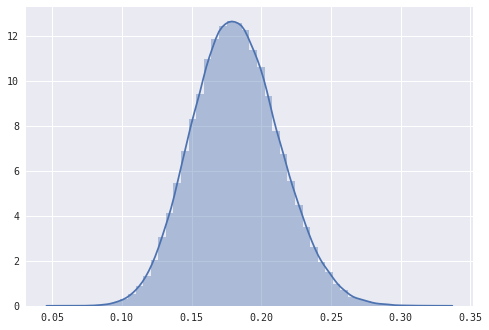

In [153]:
sns.distplot([i for i in res_rand['score']]);

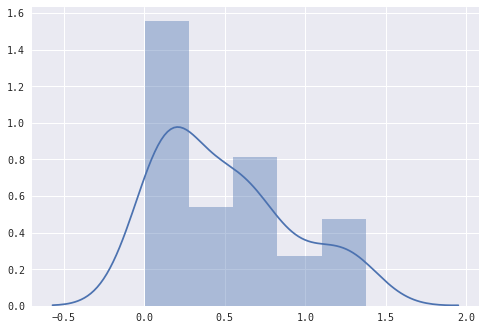

In [154]:
sns.distplot([i for i in res_lr['score']]);

In [155]:
nl = rt.get_least_linear(res_lr, res_rand, 0.999)
ml = rt.get_most_linear(res_lr, res_rand, n=10)

In [156]:
len(res_lr)

54

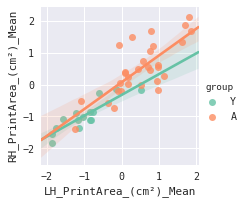

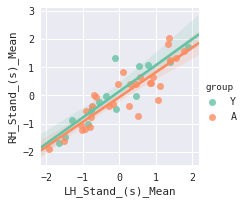

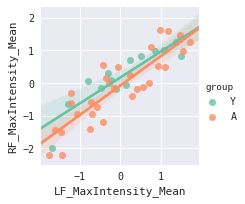

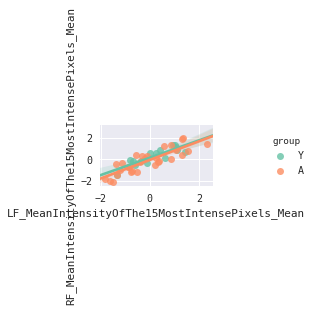

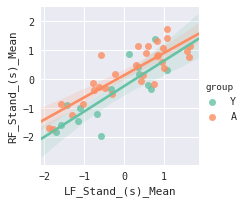

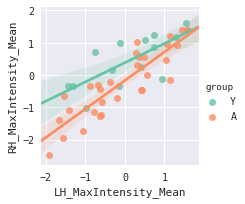

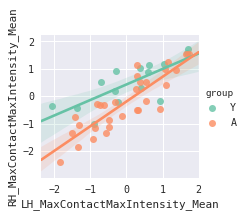

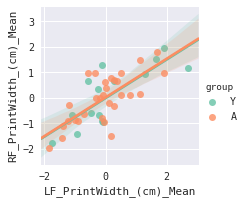

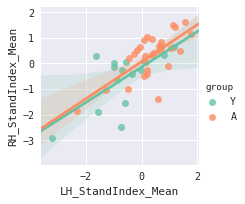

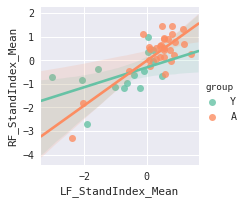

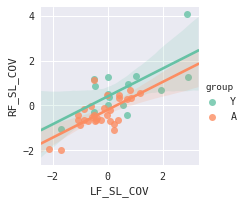

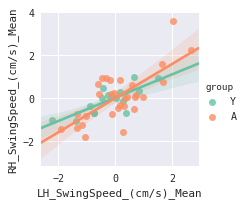

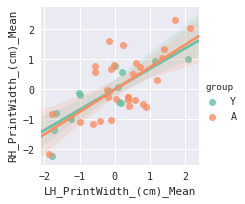

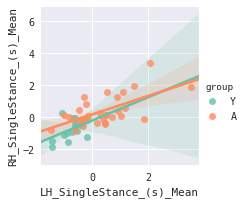

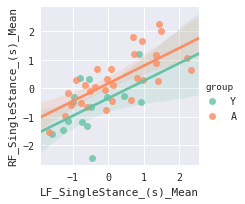

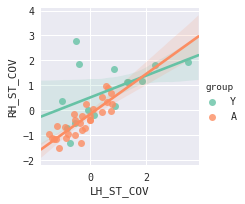

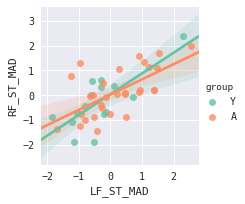

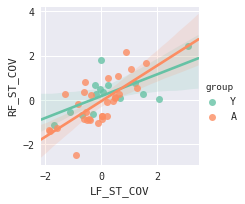

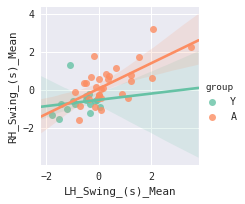

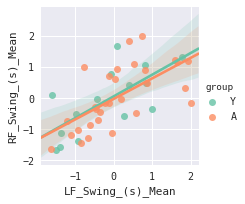

In [345]:
rt.plot_relationships_ipynb(res_lr['pair'][20:], lr, n=20, palette=color_map)

- comparison of which of those makes sense?
- some are pretty scattered. Pls data

How correlated are sided parameters?

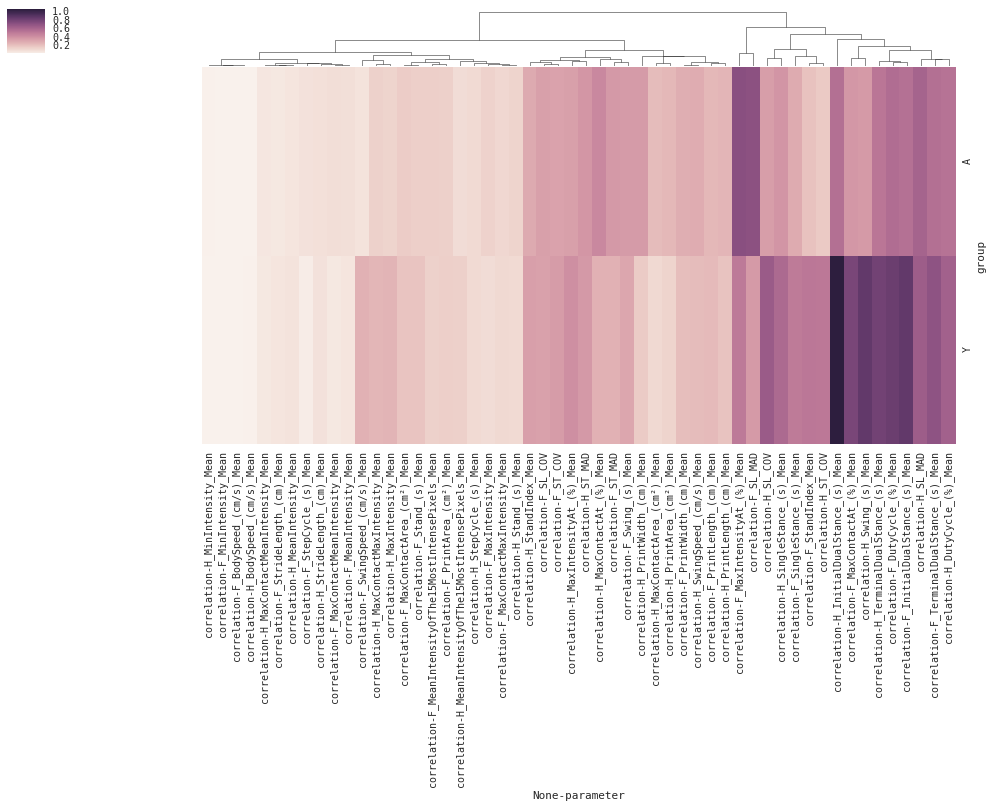

In [234]:
#plt.figure( figsize=(5,17))
sns.clustermap(corrs.pivot_table(columns='parameter', index='group'), row_cluster=False, figsize=(17,8));

What about the mean absolute difference?

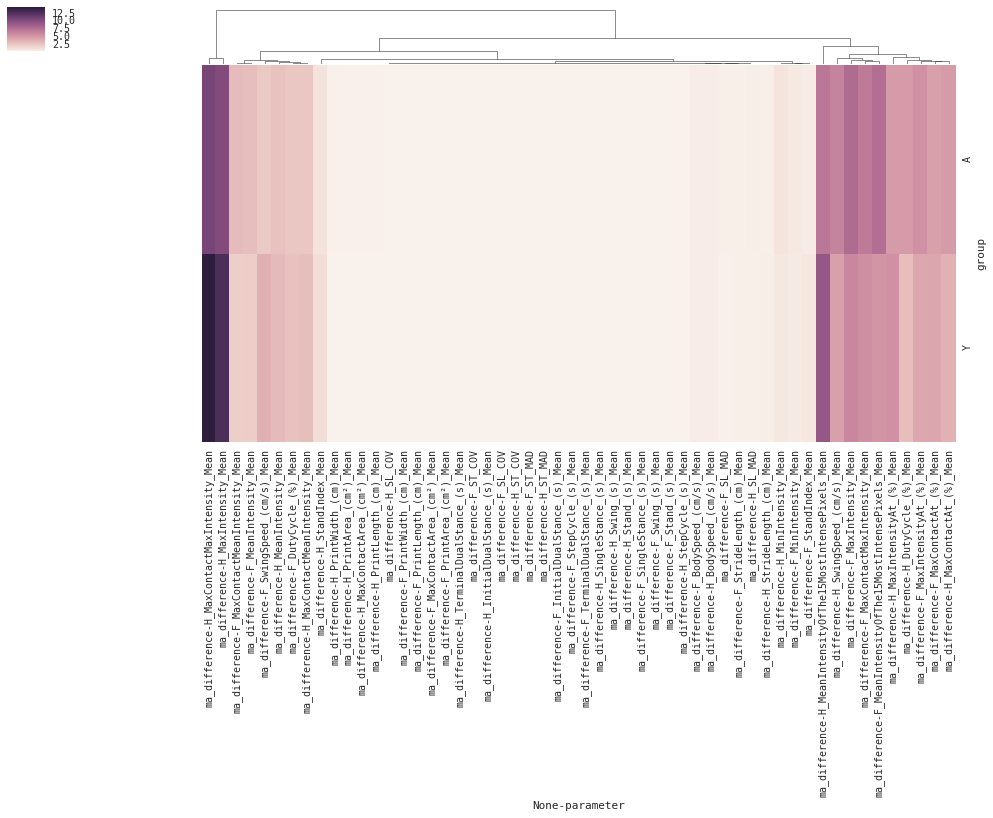

In [241]:
sns.clustermap(
    madiff.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Covariance

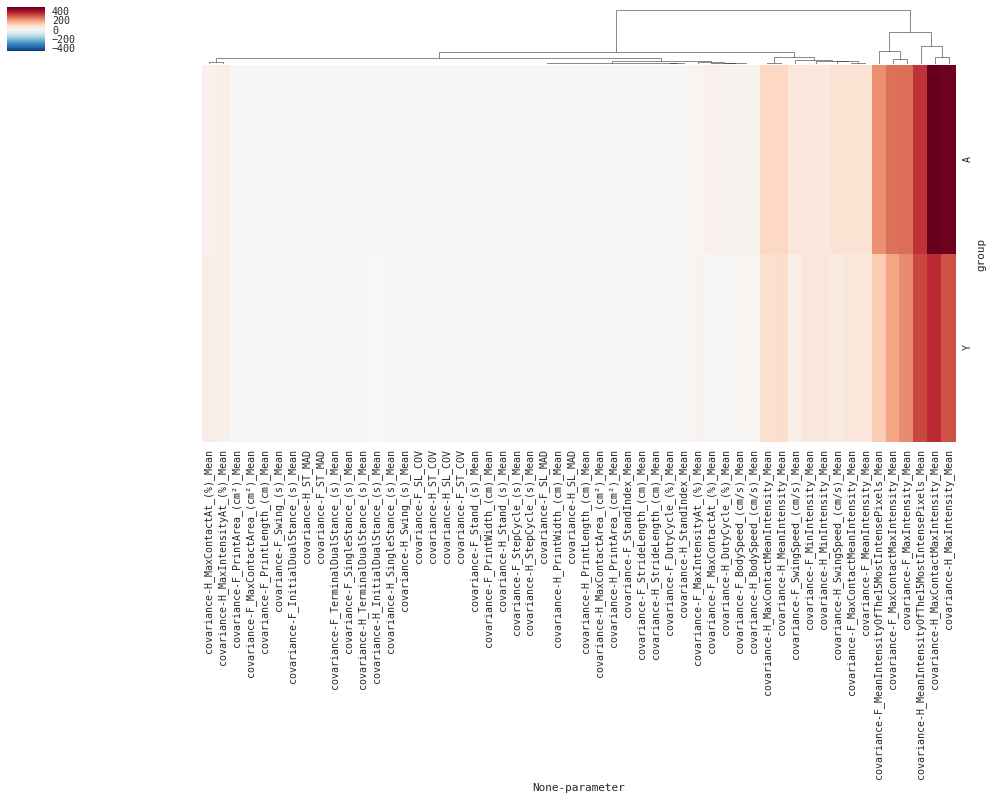

In [245]:
sns.clustermap(
    covs.pivot_table(columns='parameter', index='group'),
    row_cluster=False, figsize=(17,8));

Scatterplot / boxplot of COVs

In [259]:
d

mouse length (cm)  Normalized average run speed  \
Group Group_All Animal                                                    
Y     YC        1.1             -0.882512                      0.443822   
                1.2             -1.169975                      0.295453   
                1.3             -1.464624                      2.477003   
                1.4             -1.464624                      0.904252   
                3.2             -1.169975                      0.485108   
                3.3             -1.780834                      0.088462   
                3.4             -1.464624                      0.614069   
                4.1             -1.169975                      0.301249   
                4.2             -1.622729                      1.020084   
                4.3             -1.306520                     -0.705528   
                4.4             -1.342453                     -0.900985   
                5.1             -1.026243                      0.490239   
                5.2             -0.882512                     -0.959651   
                5.3             -0.810646                     -1.505703   
                5.4             -1.241841                     -0.867769   
A     AC        1.1              0.770401                     -0.326072   
                1.2              0.482938                     -0.449044   
                1.3             -1.241841                      0.241092   
                1.4             -0.091988                      0.094137   
                2.1              0.770401                      0.265511   
                2.2              0.195475                     -0.464159   
                2.3              1.057864                     -0.254499   
                2.4              0.770401                      0.191399   
                3.1              1.057864                     -1.127485   
                3.2              1.345327                     -1.152782   
      AT        1.1              0.195475                     -0.479198   
                1.2              1.057864                     -0.476818   
                1.3              0.770401                     -0.878796   
                1.4              0.195475                      0.280548   
                2.1              0.770401                     -0.756992   
                2.2              0.770401                      0.860890   
                2.3              0.195475                      1.832749   
                2.4              0.770401                      4.094137   
                3.1              0.770401                     -0.841351   
                3.2              1.345327                     -0.352062   
                3.3              0.770401                     -0.687911   
                3.4              0.482938                     -0.559865   
                4.1              0.195475                     -0.282089   
                4.2              0.482938                     -0.621709   
                4.3              0.770401                     -0.272477   
                4.4              1.345327                     -0.874299   
                5.1              0.482938                      0.881914   
                5.2             -0.091988                      0.548863   
                5.3              1.345327                      0.027726   
                5.4              1.057864                     -0.641460   

                        RF_Stand_(s)_Mean  RF_StandIndex_Mean  \
Group Group_All Animal                                          
Y     YC        1.1             -1.193990           -1.170111   
                1.2             -1.446396           -0.624179   
                1.3             -1.844404           -1.124329   
                1.4             -0.337827           -0.664621   
                3.2             -1.587421           -0.704741   
                3.3             -1.961858  

Plot coefficients of variation:

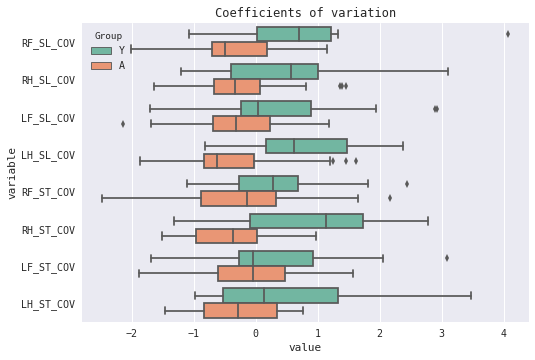

In [390]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('COV')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

Collapse left and right parameters:

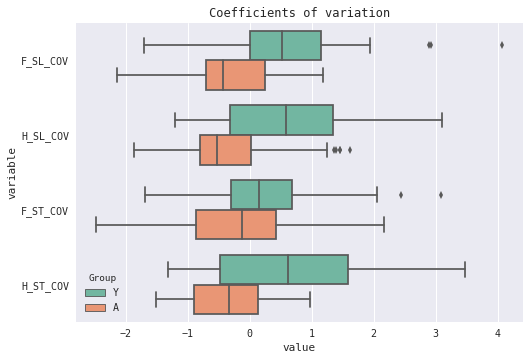

In [391]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Coefficients of variation');

Just as another way to visualize this:

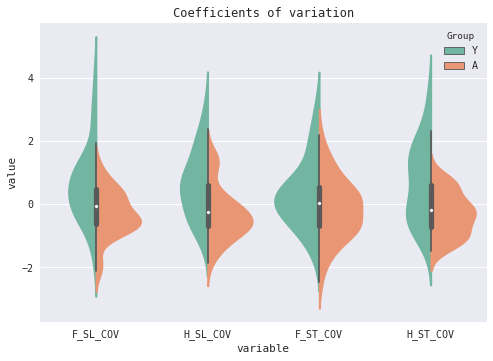

In [392]:
sns.violinplot(y="value", x="variable", hue="Group", data=d_,
               split=True, palette=color_map);
plt.title('Coefficients of variation');

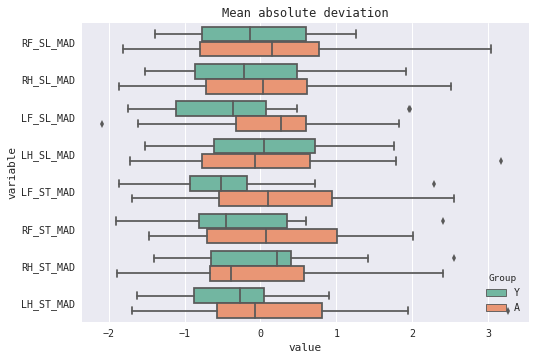

In [393]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = d.ix[:,d.columns.str.contains('MAD')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

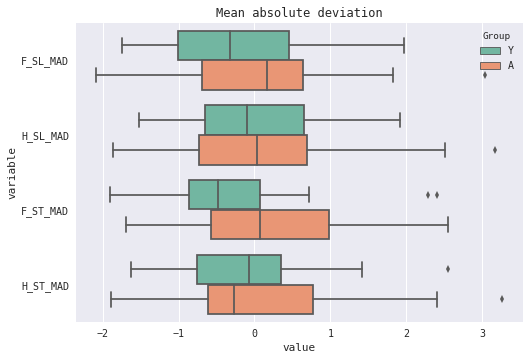

In [394]:
#be agnostic to L R
d_.variable = [i[1:] for i in d_.variable]
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Mean absolute deviation');

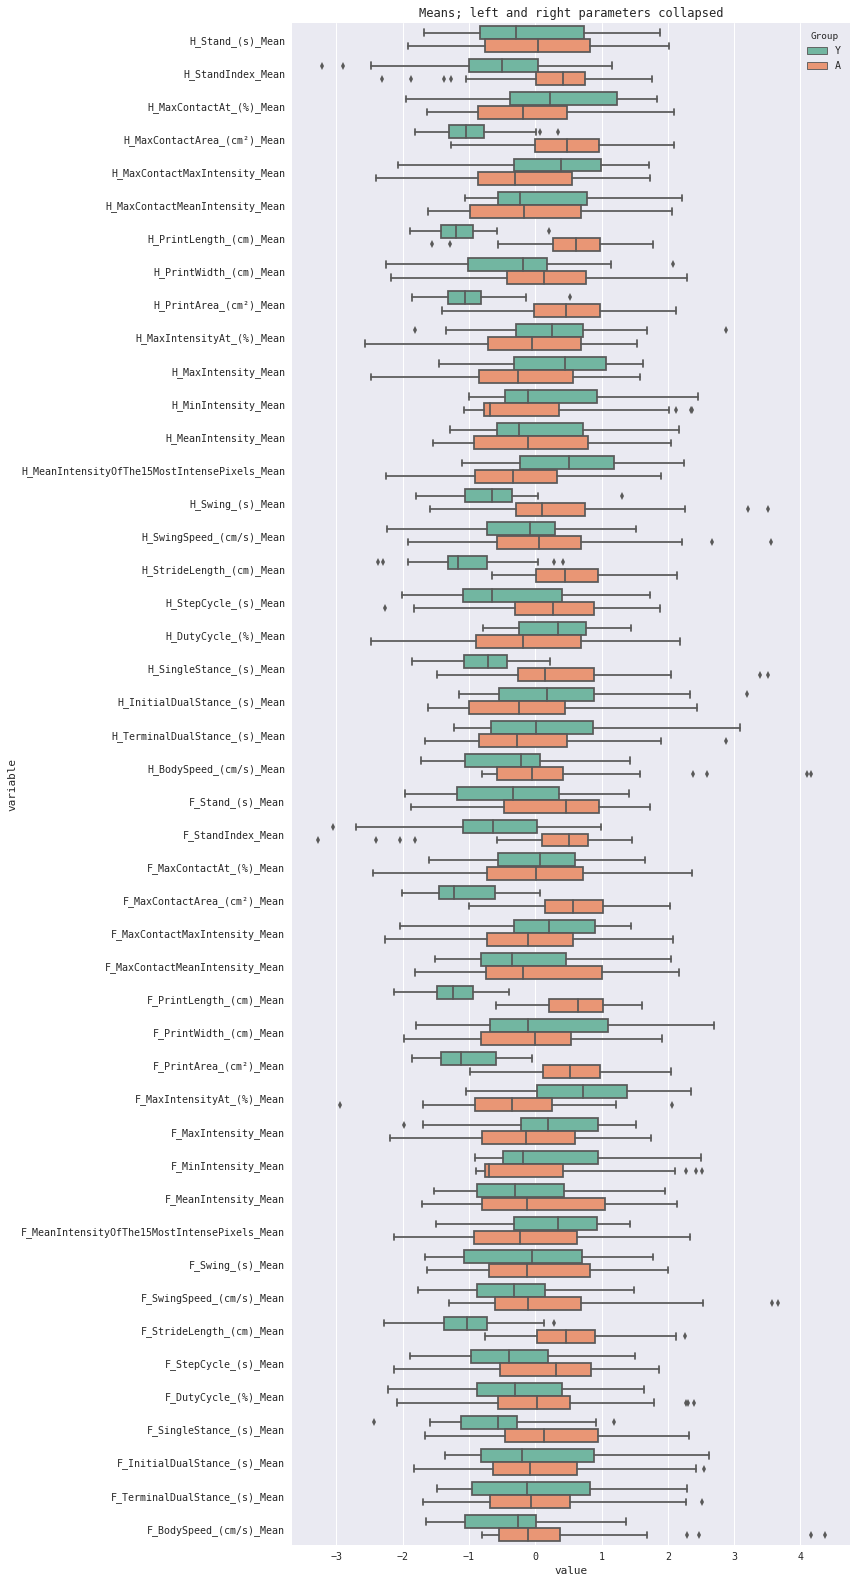

In [395]:
#sns.boxplot(d.ix[:,d.columns.str.contains('COV')]);
d_ = only_LR(d).ix[:,only_LR(d).columns.str.contains('Mean')]
d_ = pd.melt(d_.reset_index(), id_vars=d_.index.names)
d_.variable = [i[1:] for i in d_.variable]
plt.figure(figsize=(10, 28))
sns.boxplot(y='variable', x= 'value', data=d_, hue='Group', palette=color_map);
plt.title('Means; left and right parameters collapsed');